In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
data=pd.read_excel('Online retail.xlsx', header = None)
data.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [54]:
data.describe()

,0
count,7501
unique,5176
top,cookies
freq,223


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [56]:
data.isnull().sum()

,0
0,0


In [57]:
data.shape

(7501, 1)

In [103]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

# Exploratory data Analysis

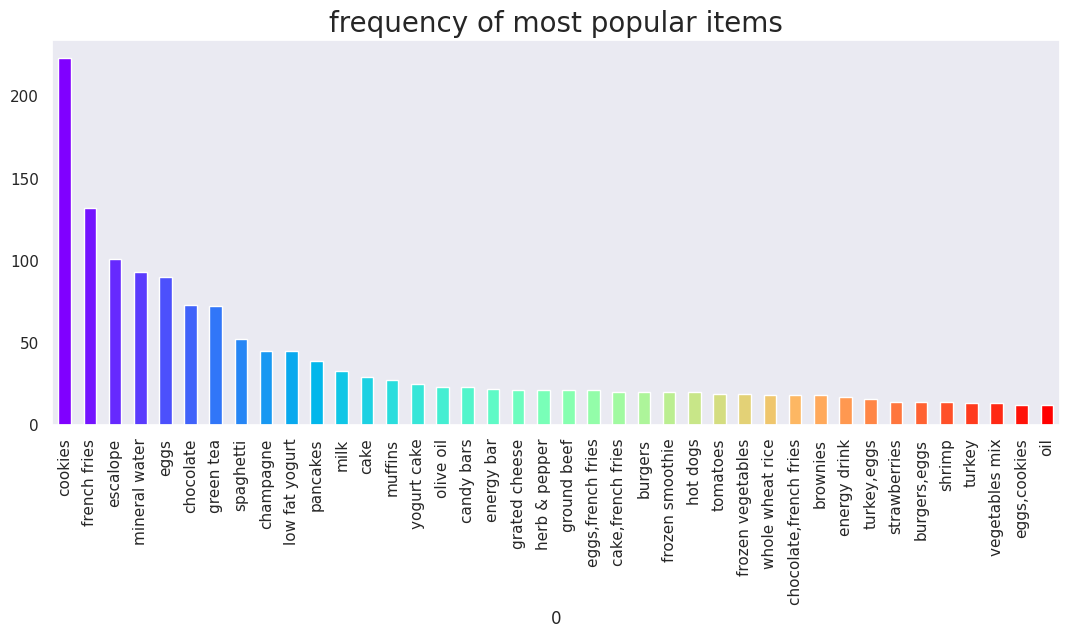

In [59]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
# Assuming the first column (index 0) contains the items you want to count
data.iloc[:, 0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [62]:
import networkx as nx
data['Food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'Food', target = 0, edge_attr = False)

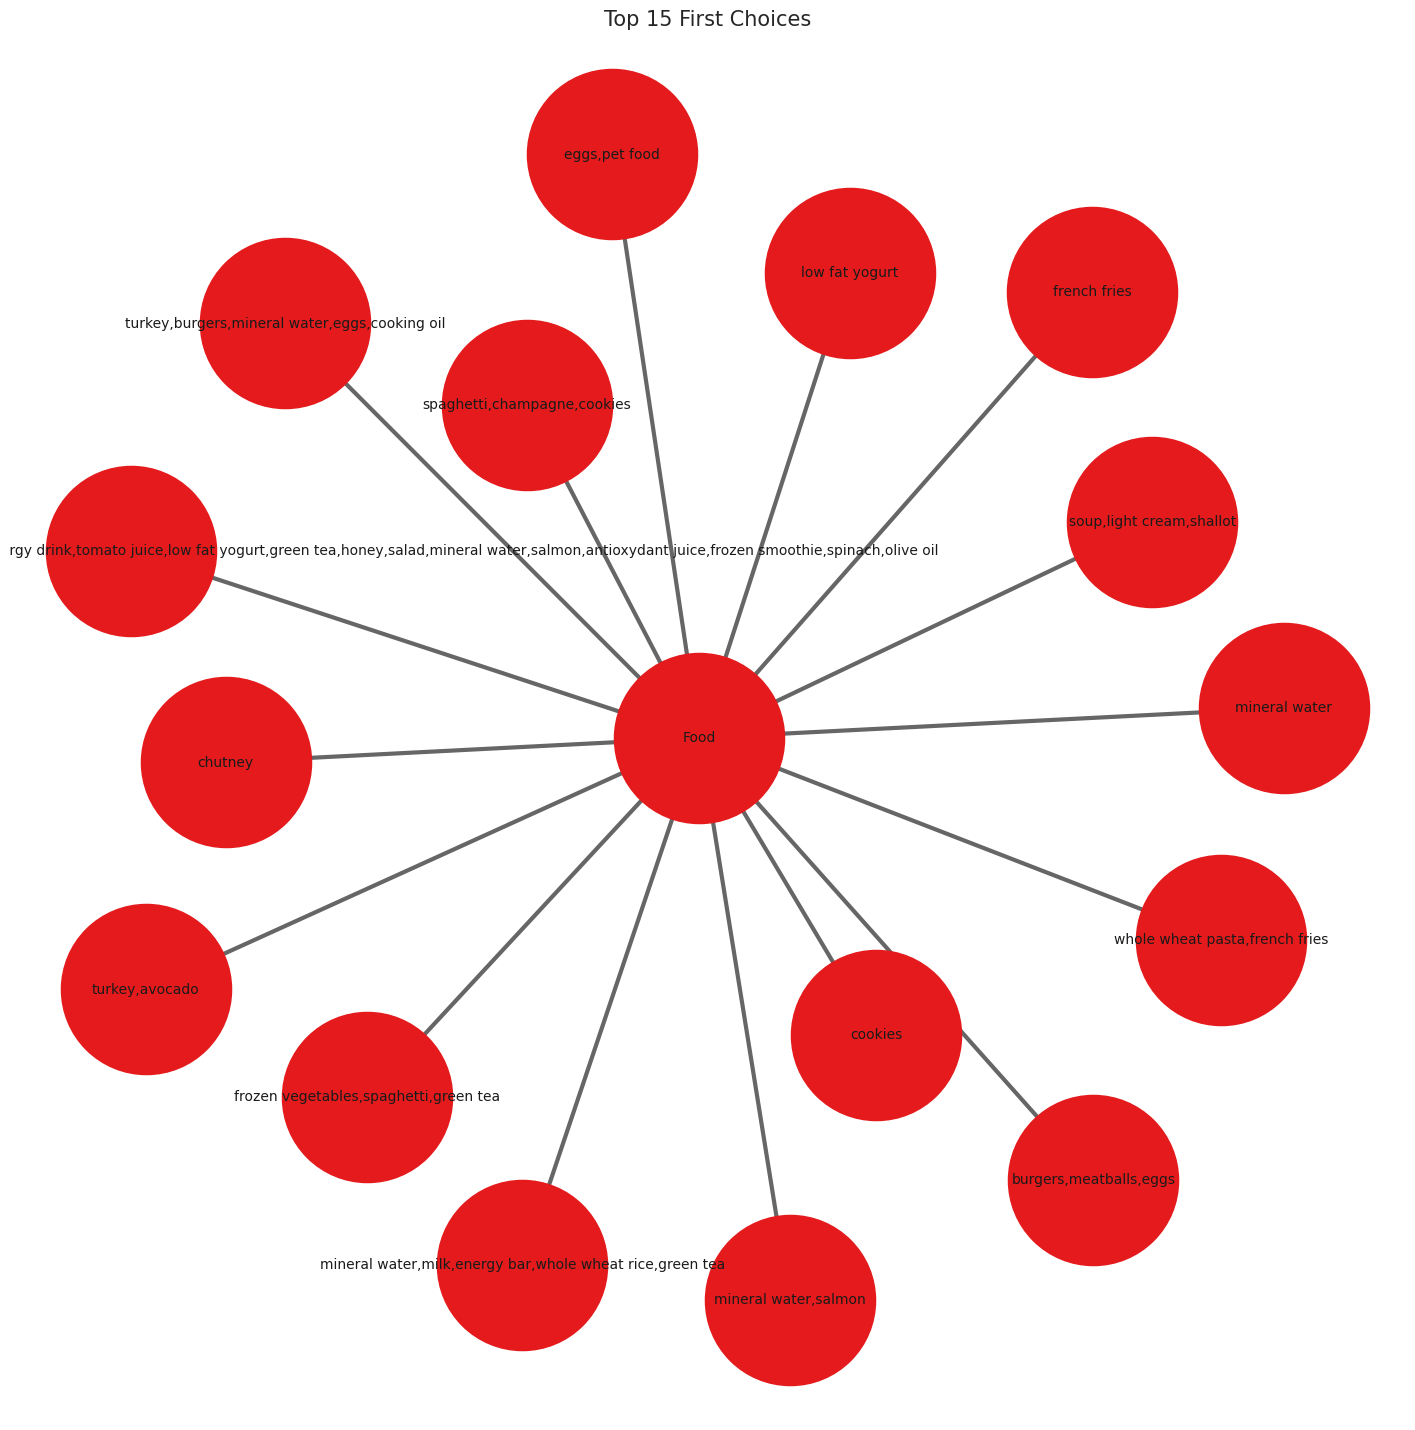

In [69]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 18)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 10, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize =15)
plt.show()

In [80]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [81]:
transactions[:1]

[['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil',
  'Food']]

In [82]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [83]:
print('# of items:',len(items))
print(list(items))

# of items: 5177
['milk,flax seed,antioxydant juice,mayonnaise,green tea', 'herb & pepper,spaghetti,cooking oil,toothpaste', 'whole wheat pasta,milk,olive oil', 'ham,ground beef,mineral water', 'yogurt cake,low fat yogurt', 'pepper,vegetables mix', 'soup,pet food,energy drink', 'shrimp,milk,french fries', 'frozen vegetables,fromage blanc,pancakes,french fries,escalope', 'mineral water,cake,cottage cheese', 'spaghetti,mineral water,pancakes,cooking oil,chocolate,frozen smoothie,escalope', 'burgers,red wine,mineral water,cake,green tea', 'turkey,mineral water,milk,salmon,green tea,chocolate,escalope', 'frozen vegetables,mineral water,carrots,french fries', 'mineral water,champagne', 'turkey,chocolate,muffins,eggs', 'muffins,honey', 'burgers,ground beef,spaghetti,mineral water,soup,milk,french wine,honey', 'turkey,avocado,eggs,barbecue sauce,cookies,salt,babies food', 'frozen vegetables,mineral water,chicken,whole wheat rice', 'spaghetti,mineral water,whole wheat rice,cooking oil', 'burge

In [84]:
if 'nan' in items: items.remove('nan')
print(list(items))

['milk,flax seed,antioxydant juice,mayonnaise,green tea', 'herb & pepper,spaghetti,cooking oil,toothpaste', 'whole wheat pasta,milk,olive oil', 'ham,ground beef,mineral water', 'yogurt cake,low fat yogurt', 'pepper,vegetables mix', 'soup,pet food,energy drink', 'shrimp,milk,french fries', 'frozen vegetables,fromage blanc,pancakes,french fries,escalope', 'mineral water,cake,cottage cheese', 'spaghetti,mineral water,pancakes,cooking oil,chocolate,frozen smoothie,escalope', 'burgers,red wine,mineral water,cake,green tea', 'turkey,mineral water,milk,salmon,green tea,chocolate,escalope', 'frozen vegetables,mineral water,carrots,french fries', 'mineral water,champagne', 'turkey,chocolate,muffins,eggs', 'muffins,honey', 'burgers,ground beef,spaghetti,mineral water,soup,milk,french wine,honey', 'turkey,avocado,eggs,barbecue sauce,cookies,salt,babies food', 'frozen vegetables,mineral water,chicken,whole wheat rice', 'spaghetti,mineral water,whole wheat rice,cooking oil', 'burgers,fresh tuna,egg

In [85]:
print(list(items))

['milk,flax seed,antioxydant juice,mayonnaise,green tea', 'herb & pepper,spaghetti,cooking oil,toothpaste', 'whole wheat pasta,milk,olive oil', 'ham,ground beef,mineral water', 'yogurt cake,low fat yogurt', 'pepper,vegetables mix', 'soup,pet food,energy drink', 'shrimp,milk,french fries', 'frozen vegetables,fromage blanc,pancakes,french fries,escalope', 'mineral water,cake,cottage cheese', 'spaghetti,mineral water,pancakes,cooking oil,chocolate,frozen smoothie,escalope', 'burgers,red wine,mineral water,cake,green tea', 'turkey,mineral water,milk,salmon,green tea,chocolate,escalope', 'frozen vegetables,mineral water,carrots,french fries', 'mineral water,champagne', 'turkey,chocolate,muffins,eggs', 'muffins,honey', 'burgers,ground beef,spaghetti,mineral water,soup,milk,french wine,honey', 'turkey,avocado,eggs,barbecue sauce,cookies,salt,babies food', 'frozen vegetables,mineral water,chicken,whole wheat rice', 'spaghetti,mineral water,whole wheat rice,cooking oil', 'burgers,fresh tuna,egg

In [86]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 26796152
[('milk,flax seed,antioxydant juice,mayonnaise,green tea', 'herb & pepper,spaghetti,cooking oil,toothpaste'), ('milk,flax seed,antioxydant juice,mayonnaise,green tea', 'whole wheat pasta,milk,olive oil'), ('milk,flax seed,antioxydant juice,mayonnaise,green tea', 'ham,ground beef,mineral water'), ('milk,flax seed,antioxydant juice,mayonnaise,green tea', 'yogurt cake,low fat yogurt'), ('milk,flax seed,antioxydant juice,mayonnaise,green tea', 'pepper,vegetables mix')]


# One-hot encoding transaction data

In [87]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Create transaction encoder
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Print the one-hot encoded transaction dataset
print(onehot_df)


   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True
5   True   False   True  False   True


In [88]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'transactions' contains your transaction data
# Create transaction encoder
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Check if 'nan' column exists before dropping it
if 'nan' in onehot_df.columns:
    onehot_df = onehot_df.drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
print(onehot_df.head())

   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True


In [89]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,bread,butter,eggs,jam,milk
0,True,False,True,False,True
1,True,True,False,True,False
2,True,True,False,True,True
3,True,True,True,False,False
4,True,True,False,False,True


In [90]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
bread,1.000000
butter,0.666667
milk,0.666667
eggs,0.500000
jam,0.333333


In [91]:
support.describe()

,support
count,5.000000
mean,0.633333
std,0.247207
min,0.333333
25%,0.500000
50%,0.666667
75%,0.666667
max,1.000000


# Recommending food with support

In [92]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['bread'], onehot['milk']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['milk'], onehot['eggs']).mean()

# Print support values
print("bread and butter: %.2f" % supportBF)
print("bread and milk: %.2f" % supportBM)
print("milk and eggs: %.2f" % supportFM)

bread and butter: 0.67
bread and milk: 0.67
milk and eggs: 0.33


# Computing the support metric

In [93]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['bread+milk'] = np.logical_and(onehot['bread'], onehot['milk'])

# Compute the support
support = onehot.mean()
val = support.loc['bread+milk']

# Print the support values
print(f'bread+milk = {val}')

bread+milk = 0.6666666666666666


# Refining support with confidence

In [94]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['bread'], onehot['milk']).mean()

# Compute support for mineral water
supportM = onehot['bread'].mean()

# Compute support for french fries
supportF = onehot['milk'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('bread= {0:.2f},milk = {1:.2f}'.format(confidenceMM, confidenceMF))

bread= 0.67,milk = 1.00


# Further refinement with lift

In [95]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 1.00


# Computing conviction

In [96]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Compute support for burgers
supportB = onehot['bread'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['butter'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.00


# Computing leverage with a function

In [97]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

In [98]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

# Promoting food with conviction

In [99]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['milk'], onehot['eggs'])
convictionFB = conviction(onehot['bread'], onehot['butter'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['milk'], onehot['eggs'])
convictionMB = conviction(onehot['bread'], onehot['butter'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['milk'], onehot['eggs'])
convictionMF = conviction(onehot['bread'], onehot['butter'])

# Print results
print('milk ->eggs: ', convictionFB)
print('bread -> butter: ', convictionBF)

milk ->eggs:  1.0
bread -> butter:  1.0


# Computing association and dissociation

In [100]:
# Compute the support of burgers and french fries
supportT = onehot['milk'].mean()
supportP = onehot['eggs'].mean()

# Compute the support of both food items
supportTP = np.logical_and(onehot['bread'], onehot['butter']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

1.4999999999999998


#  Applying Apriori algorithm

In [101]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Convert transactions to one-hot encoded format
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support               itemsets
0   1.000000                (bread)
1   0.666667               (butter)
2   0.500000                 (eggs)
3   0.333333                  (jam)
4   0.666667                 (milk)
5   0.666667        (butter, bread)
6   0.500000          (bread, eggs)
7   0.333333           (bread, jam)
8   0.666667          (bread, milk)
9   0.333333          (butter, jam)
10  0.333333         (butter, milk)
11  0.333333           (milk, eggs)
12  0.333333   (butter, bread, jam)
13  0.333333  (butter, bread, milk)
14  0.333333    (bread, eggs, milk)

Association Rules:
      antecedents      consequents  antecedent support  consequent support  \
0        (butter)          (bread)            0.666667            1.000000   
1          (eggs)          (bread)            0.500000            1.000000   
2           (jam)          (bread)            0.333333            1.000000   
3          (milk)          (bread)            0.666667            1.00000

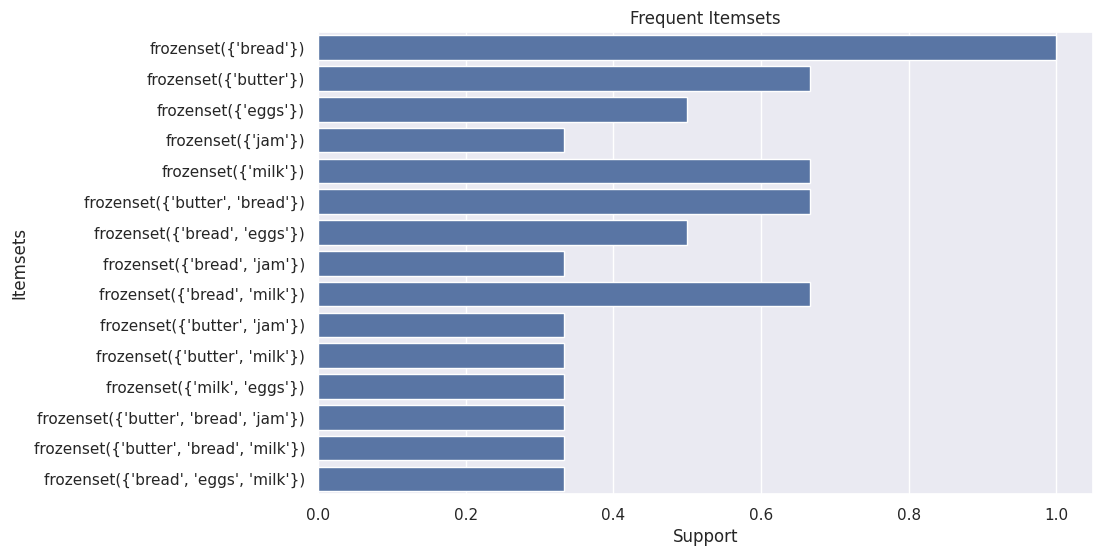

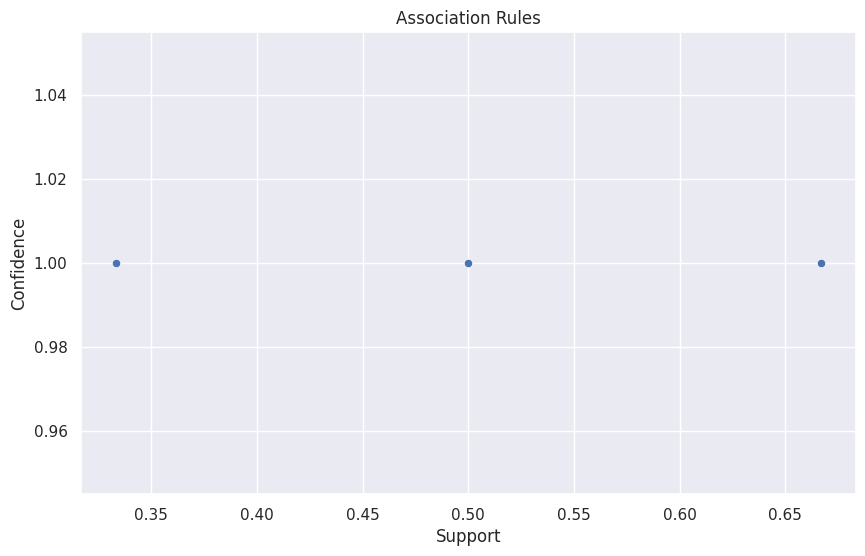

In [102]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (list of lists)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

# Convert transactions to one-hot encoded format
encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Plotting frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

# Plotting association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()


# Interview Questions

1.	What is lift and why is it important in Association rules?

Lift measures how much more likely two items are to be bought together than if they were independent. It's important because it helps identify the strength of an association, beyond mere co-occurrence.




---



2.  What is support and Confidence. How do you calculate them?





*  Support: The proportion of transactions that include both items in a rule. It's calculated as
Support
(
𝐴
⇒
𝐵
)
=
Count of Transactions with A and B
Total Transactions
Support(A⇒B)=
Total Transactions
Count of Transactions with A and B
​
 .
*   Confidence: The probability that item B is purchased given that item A is purchased. It's calculated as
Confidence
(
𝐴
⇒
𝐵
)
=
Support
(
𝐴
⇒
𝐵
)
Support
(
𝐴
)
Confidence(A⇒B)=
Support(A)
Support(A⇒B)
​
 .




---



3.	What are some limitations or challenges of Association rules mining?

Limitations/Challenges:

Handling large datasets can be computationally intensive.
Many generated rules might be uninteresting or trivial.
Setting appropriate thresholds for support, confidence, and lift can be challenging.